# 1 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 2 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
- 분석결과를 통해 가설을 검정해 봅니다.

# 3 라이브러리 로드

In [4]:
# pandas는 데이터 분석용 라이브러리,  
# numpy는 수치 계산 라이브러리, 
# seaborn은 matplotlib을 사용하기 쉽게 만든 시각화 라이브러리입니다. 
# matplotlib은 그래프의 폰트 바꾸기, 스타일 변경, 사이즈 조정, 
# 서브 플롯 사용을 위해 로드하는 라이브러리입니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# 한글폰트 설정

In [5]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보인다.
# 한글이 출력될 수 있도록 폰트 설정
# 운영체제별 설정을 위해 로드

import os

plt.rc('font',family='Malgun Gothic')

plt.rc('axes',unicode_minus=False)

In [6]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.

%config InlineBackend.figure_format = 'retina'

# 5 데이터 불러오기

In [7]:
!move "C:\Users\BIT-R45\Downloads\새 폴더\NHIS_OPEN_GJ_2017.csv"

        1개 파일을 이동했습니다.


In [10]:
# 다운로드 받은 파일을 판다스의 read_csv를 통해 읽어오자
# 파일을 읽어온 후 shape로 행과 열의 수를 출력하자.
df=pd.read_csv('file-path/data/NHIS_OPEN_GJ_2017.csv',encoding='cp949')
df.shape

(1000000, 34)

## 5.1 데이터 미리보기

In [26]:
# sample,head,tail를 통해 데이터를 미리보기 합니다.
# 함수 옵션보기는 shift + tab
df.head(5)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


In [28]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,1,10,48,175,80,92.1,1.5,1.5,...,27.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,1,8,41,170,75,86.0,1.0,1.5,...,15.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,17.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,...,17.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999999,2017,1000000,1,11,41,160,70,90.5,1.0,1.5,...,36.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [30]:
# 랜덤으로 하나 가져옴
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
215663,2017,215664,2,11,11,160,60,78.0,1.5,1.5,...,38.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


# 6 기본 정보 보기

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [32]:
df.describe()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,999734.000000,999817.000000,999811.000000,...,999958.000000,999856.000000,999464.000000,1000000.000000,0.0,0.0,0.0,0.0,400523.000000,1000000.0
mean,2017.0,500000.500000,1.469590,10.527041,33.694584,162.22823,63.268710,81.231603,0.980478,0.978032,...,37.184273,1.607704,0.499293,0.400523,NaN,NaN,NaN,NaN,0.602130,20181126.0
std,0.0,288675.278933,0.499075,2.841183,12.672969,9.28462,12.520732,11.837625,0.608810,0.607122,...,50.624330,0.818454,0.500000,0.490005,NaN,NaN,NaN,NaN,0.590891,0.0
min,2017.0,1.000000,1.000000,5.000000,11.000000,130.00000,25.000000,8.000000,0.100000,0.100000,...,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
25%,2017.0,250000.750000,1.000000,8.000000,27.000000,155.00000,55.000000,74.100000,0.700000,0.700000,...,16.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
50%,2017.0,500000.500000,1.000000,10.000000,41.000000,160.00000,60.000000,81.000000,1.000000,1.000000,...,23.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
75%,2017.0,750000.250000,2.000000,13.000000,43.000000,170.00000,70.000000,87.800000,1.200000,1.200000,...,39.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
max,2017.0,1000000.000000,2.000000,18.000000,50.000000,190.00000,140.000000,999.000000,9.900000,9.900000,...,999.000000,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,20181126.0


In [33]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다.
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [34]:
# dtypes 를 통해 데이터 형식만 출력합니다.
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

# 7 결측치 보기

In [36]:
# isnull을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다의 결측치 수를 세어줍니다.
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

In [39]:
# isna로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계할 수 있습니다.
# isnull과 같은기능
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

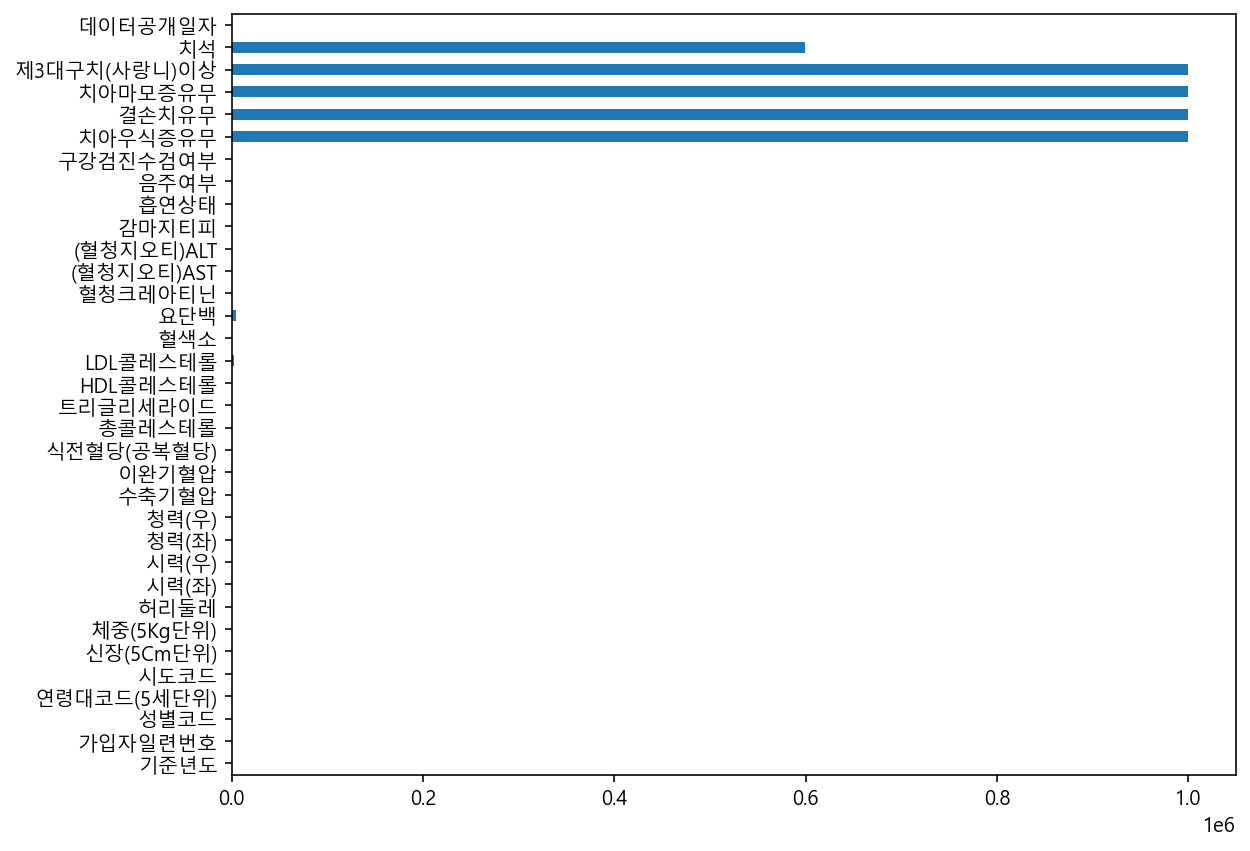

In [44]:
# 판다스에 내장 된 plot을 통해 시각화를 합니다.
df.isnull().sum().plot.barh(figsize=(9,7))

# 8 일부 데이터 요약하기

In [50]:
# 여러 컬럼을 가져옵니다.
# '(혈청지오티)AST', '(혈청지오티)ALT'를 가져와 미리보기합니다.
#  두 개의 컬럼을 가져올때는 리스트 형태로 감싸서 표현해주어야함.
df[['(혈청지오티)AST','(혈청지오티)ALT']].head()

,(혈청지오티)AST,(혈청지오티)ALT
0,21.0,35.0
1,20.0,36.0
2,47.0,32.0
3,29.0,34.0
4,19.0,12.0


In [52]:
# '(혈청지오티)AST', '(혈청지오티)ALT'를 요약합니다.
df[['(혈청지오티)AST','(혈청지오티)ALT']].describe()

,(혈청지오티)AST,(혈청지오티)ALT
count,999959.000000,999958.000000
mean,25.994671,25.749509
std,23.587469,26.294770
min,1.000000,1.000000
25%,19.000000,15.000000
50%,23.000000,20.000000
75%,28.000000,29.000000
max,9999.000000,7210.000000


# 9 value_counts 로 값 집계하기

In [53]:
# value_counts 를 통해 성별코드로 그룹화 하고 갯수를 집계합니다.
df['성별코드'].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [55]:
# value_counts 를 통해 흡연상태로 그룹화 하고 갯수를 집계합니다.
df['흡연상태'].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

# 10 groupby와 pivot_table 사용하기

## 10.1 groupby

In [59]:
# groupby를 통해 데이터를 그룹화합니다.
# 성별코드로 그룹화 한 데이터를 세어 봅니다.
# 함수 뒤에 ?하고 실행시키면 도움말을 볼 수있다. 도움말 맨 밑에 예제가 있는데
# 예제를 보면 쉽게 이해할 수 있다.

df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [60]:
# 성별코드와 음주여부로 그룹화를 하고 갯수를 세어봅니다.
df.groupby(['성별코드','음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [61]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균을 구합니다.
# 음주하고 있는 사람들이 감마지티피의 평균수치가 더 높다.
df.groupby(['성별코드','음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     0.0     34.739868
      1.0     56.610981
2     0.0     22.612408
      1.0     25.001018
Name: 감마지티피, dtype: float64

In [74]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구합니다.
# groupby 앞에가 index 뒤에부분이 values
df.groupby(['성별코드','음주여부'])['감마지티피'].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [63]:
# agg를 사용하면 여러 수치를 함께 구할 수 있습니다.

df.groupby(['성별코드','음주여부'])['감마지티피'].agg(['count','mean','median'])

count       mean  median
성별코드 음주여부                           
1    0.0   173604  34.739868    25.0
     1.0   356576  56.610981    37.0
2    0.0   326813  22.612408    17.0
     1.0   142429  25.001018    17.0

## 10.2 pivot_table

In [67]:
# 음주여부에 따른 그룹화된 수를 피벗테이블로 구합니다.
# 피벗테이블과 그룹바이는 거의 비슷한 역할을 한다.
# 피벗테이블과 그룹바이의 차이점은 데이터프레임으로 출력되느냐 시리즈로 출력되느냐 이다.
# 피벗테이블은 기본이 평균값을 구해줌.
# 어그리게이션 펑션을 따로 지정해주면 다른값을 구할 수 있음.

df.pivot_table(index='음주여부',values='가입자일련번호',aggfunc='count')

,가입자일련번호
음주여부,
0.0,500439
1.0,499025


In [71]:
# 음주여부에 따른 감마지티피의 평균을 구합니다.
df.pivot_table(index='음주여부',values='감마지티피',aggfunc=['mean','median'])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.819650,19.0
1.0,47.588675,30.0


In [72]:
# 기본값은 평균을 구하지만 aggfunc를 통해 지정해 줄 수도 있습니다.
df.pivot_table(index='음주여부',values='감마지티피',aggfunc=['mean','median'])


,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.819650,19.0
1.0,47.588675,30.0


In [75]:
# aggfunc에 describe를 사용해 통계용약값을 한번에 볼 수도 있습니다.
# 성별코드, 음주여부에 따른 감마지티피 값의 평균을 구합니다.

df.pivot_table(index=['성별코드','음주여부'],values='감마지티피',aggfunc='describe')

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     1.0   24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    0.0   13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     1.0   13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 11.전체데이터 시각화 하기
- 100만개가 넘는 데이터를 시각화 할떄는 되도록이면 group by 혹은 pivot_table로 연산을  하고 시각화를 하는 것을 권장합니다.
- 100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을 하는 그래프를 사용하게 되면 많이 느릴 수 있습니다.

## 11.1 히스토그램
- 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어 진 것을 확인 할 수 있었습니다.
- 히스토그램을 사용하면 수치데이터를 bin의 갯수만큼 그룹화 해서 도수분포표를 만들고 그결과를 시각화 합니다.
- 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그립니다.

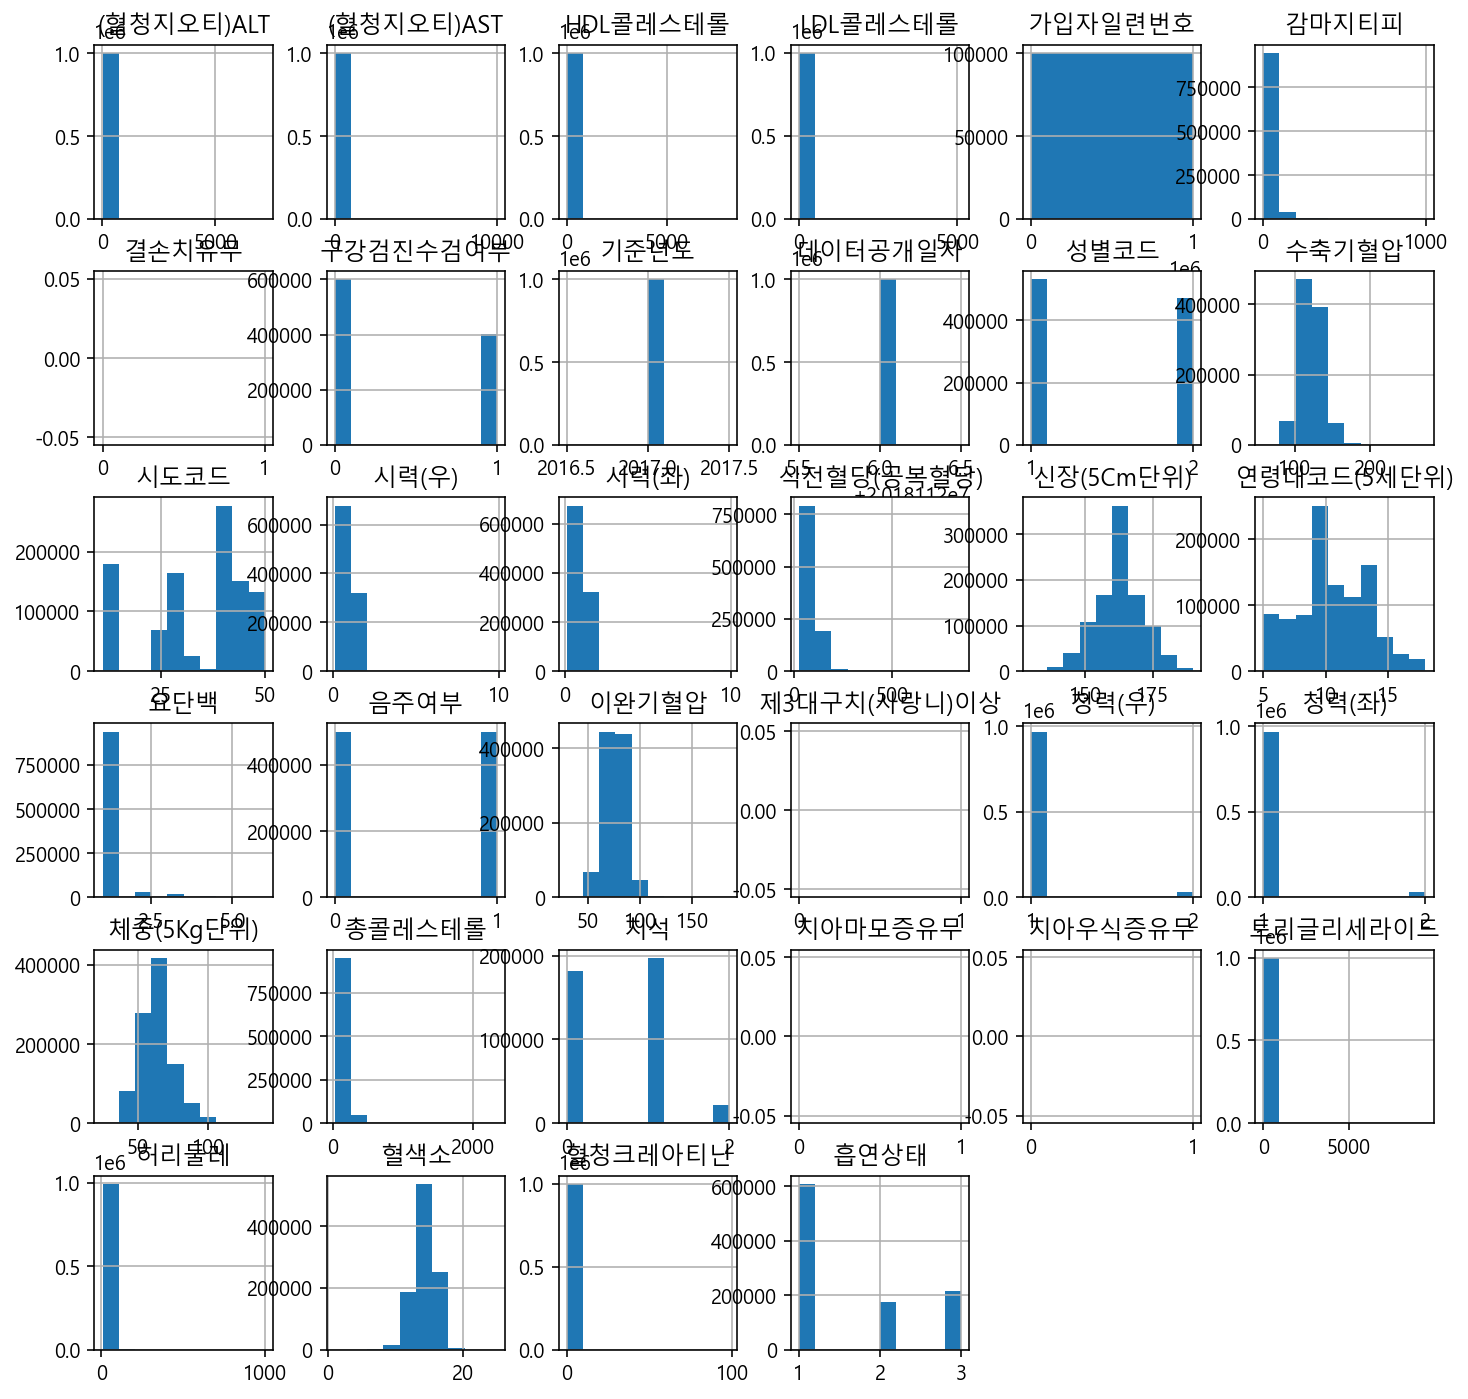

In [79]:
# 전체 데이터에 대한 히스토그램을 출력합니다.
h = df.hist(figsize=(12,12))

## 11.2 슬라이싱을 사용해 히스토그램 그리기
- 슬라이싱 기능을 사용해서 데이터를 나누어 그립니다.
- 슬라이싱 사용시 iloc를 화룡ㅇ하면 인덱스의 순서대로 슬라이싱이 가능합니다.
- iloc[행,열]순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 뎅터를 가져오고자 할 때는 [:,:]을 사용합니다
- 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작 인덱스:끝나는 인덱스(+1)을 지정할 수 있습니다.

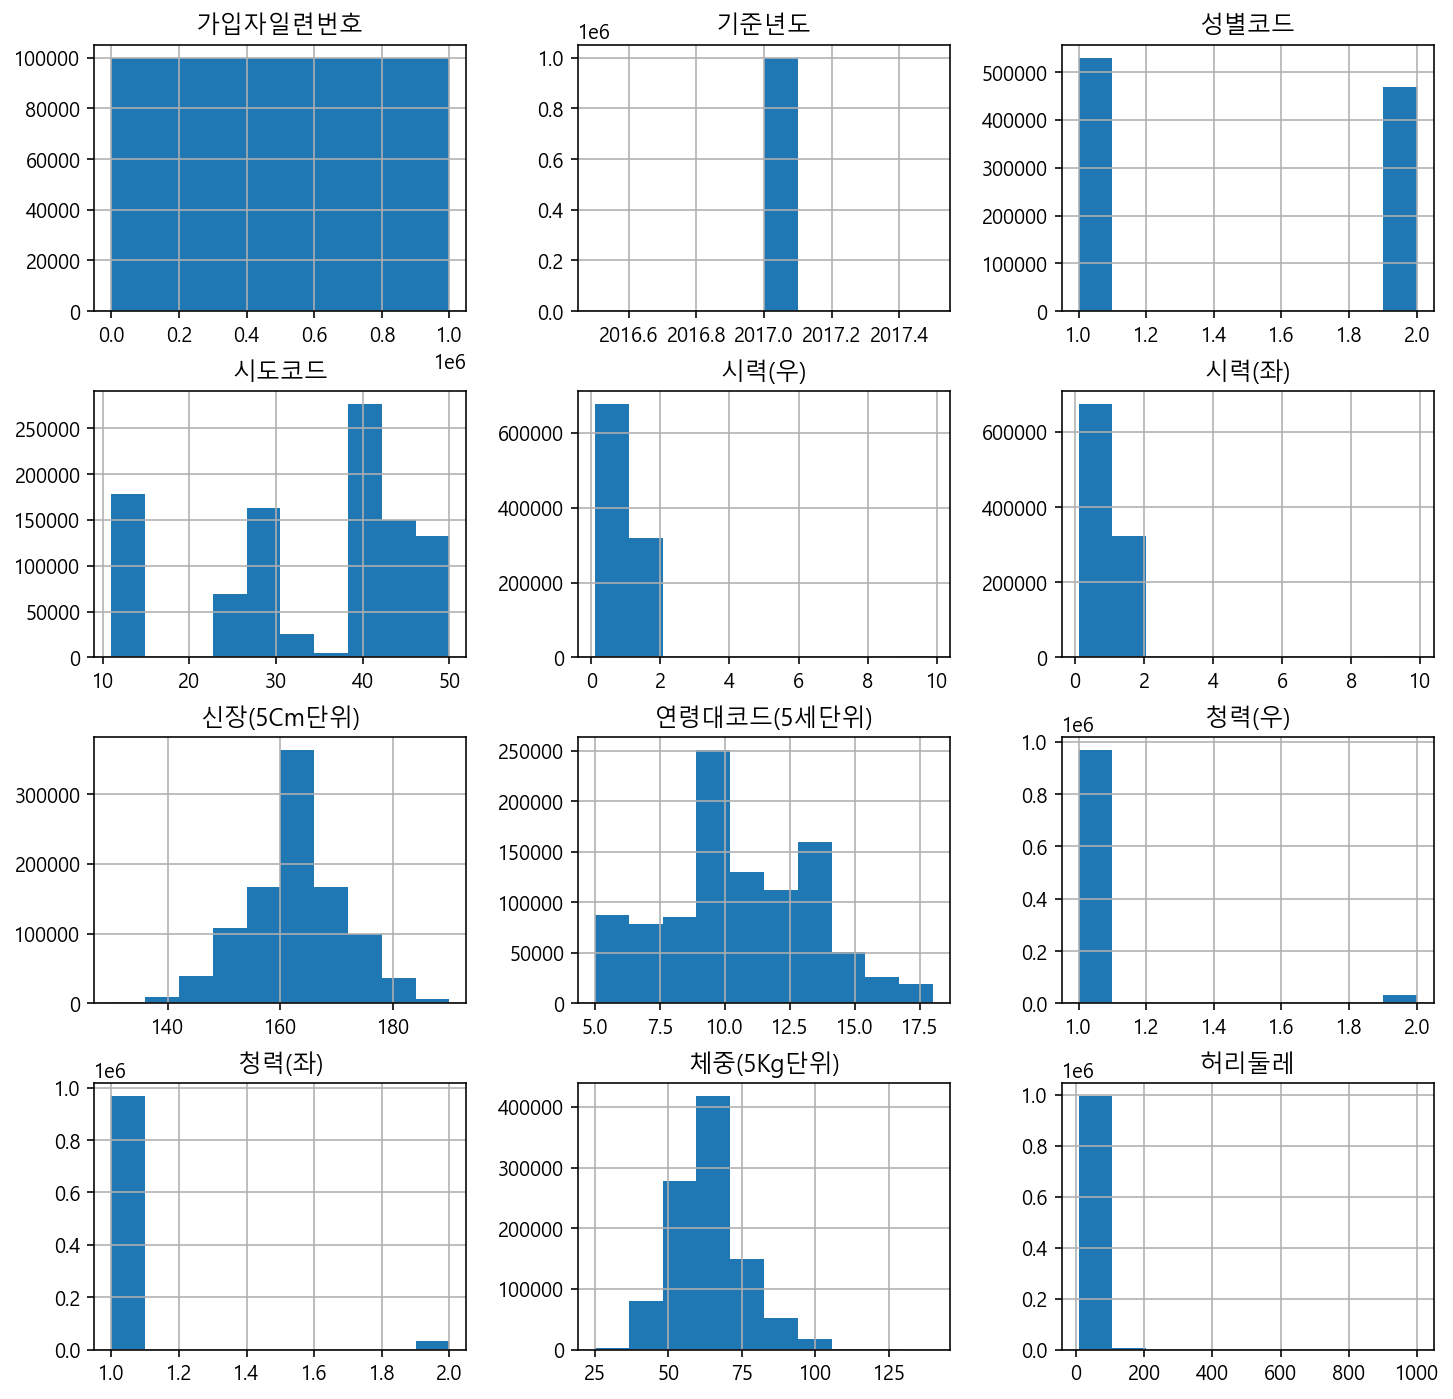

In [81]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램을 그립니다.
# [행,열]

h =df.iloc[:,:12].hist(figsize=(12,12))

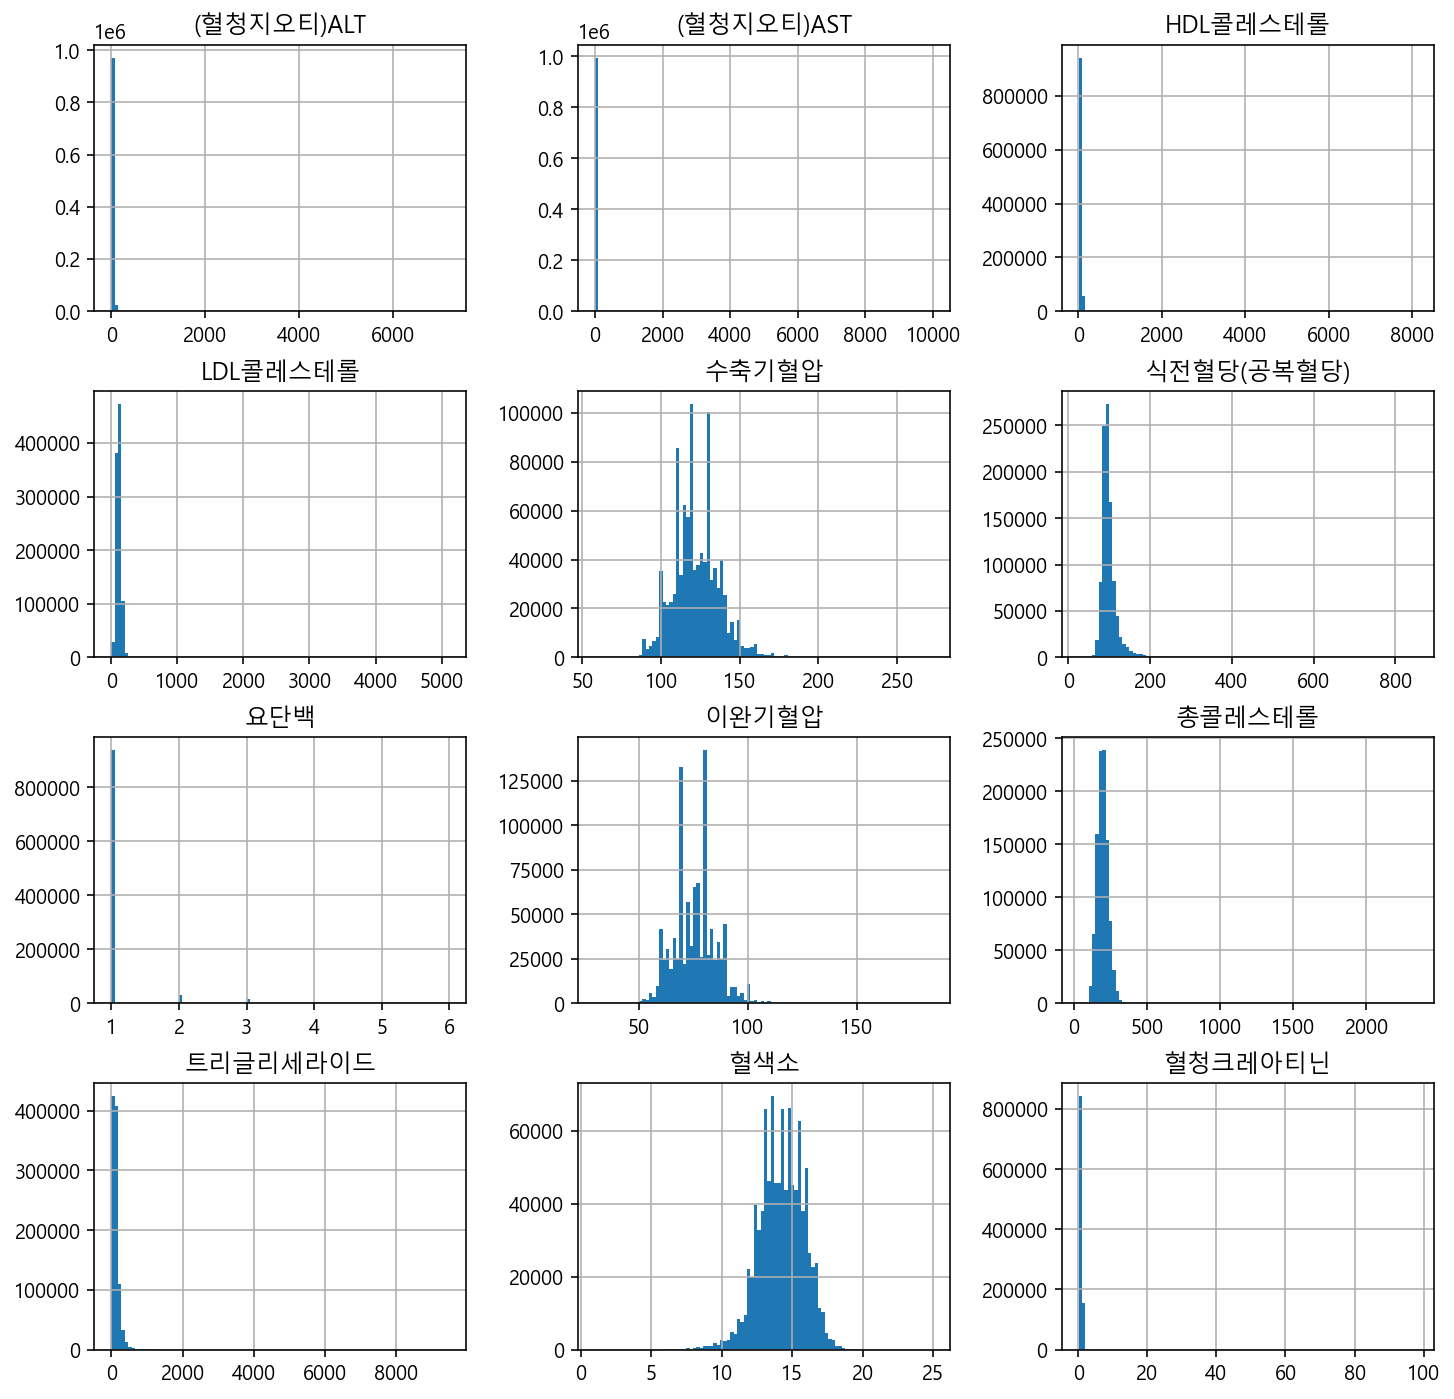

In [84]:
# 슬라이싱을 사용해 앞에서 12번째 부터 23번째까지 컬럼에 대한 데이터로 히스토그램을 그립니다.
# bins는 막대의 개수를 설정해 줄 수 있다.
h=df.iloc[:,12:24].hist(figsize=(12,12),bins=100)

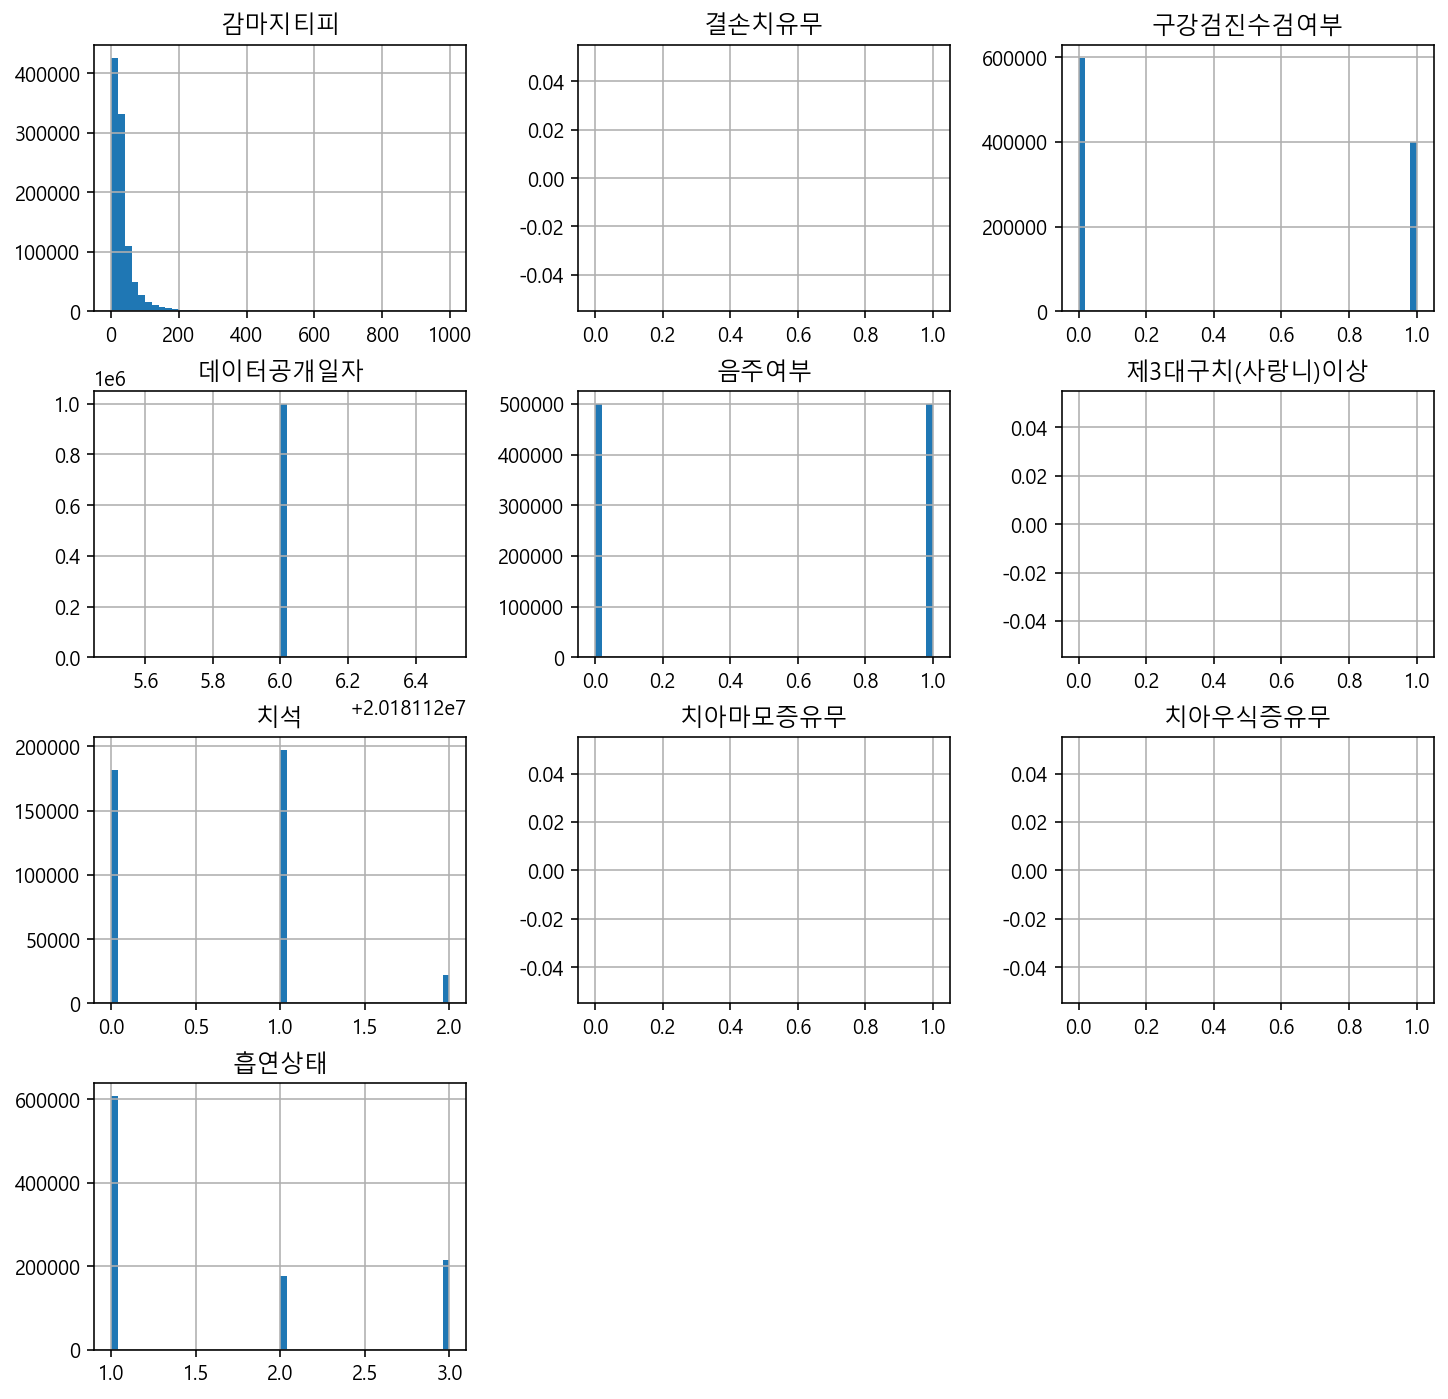

In [86]:
# 슬라이싱을 사용해 앞에서 24번째부터 마지막까지 컬럼에 대한 데이터로 히스토그램을 그립니다.

h=df.iloc[:,24:].hist(figsize=(12,12),bins=50)